# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "./data/Mouse_metadata.csv"
study_results_path = "./data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
Combined= pd.merge(study_results,mouse_metadata,on='Mouse ID')

# Display the data table for preview
Combined.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [3]:
# Checking the number of mice.
mice_count=Combined['Mouse ID'].nunique()
mice_count

249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
Combined[Combined.duplicated(subset=['Mouse ID','Timepoint'])]['Mouse ID'].unique()

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicates =Combined[Combined.duplicated(subset=['Mouse ID','Timepoint'],keep=False)]
duplicates

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

Combined_NoDup=Combined[Combined['Mouse ID']!='g989']

In [7]:
# Checking the number of mice in the clean DataFrame.
clean=Combined_NoDup['Mouse ID'].nunique()
clean

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
grouped=Combined_NoDup.groupby('Drug Regimen')

gmean=grouped['Tumor Volume (mm3)'].mean()
gmedian=grouped['Tumor Volume (mm3)'].median()
gvariance=grouped['Tumor Volume (mm3)'].var()
gStdDev=grouped['Tumor Volume (mm3)'].std()
gStdErr=grouped['Tumor Volume (mm3)'].sem()

summaryStatistics=pd.DataFrame({
    'Mean Tumor Volume':gmean,
    'Median Tumor Volume':gmedian,
    'Tumor Volume Variance':gvariance,
    'Tumor Volume Std. Dev.':gStdDev,
    'Tumor Volume Std. Err.':gStdErr
})

summaryStatistics

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summaryStatisticsAgg=grouped['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
summaryStatisticsAgg

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

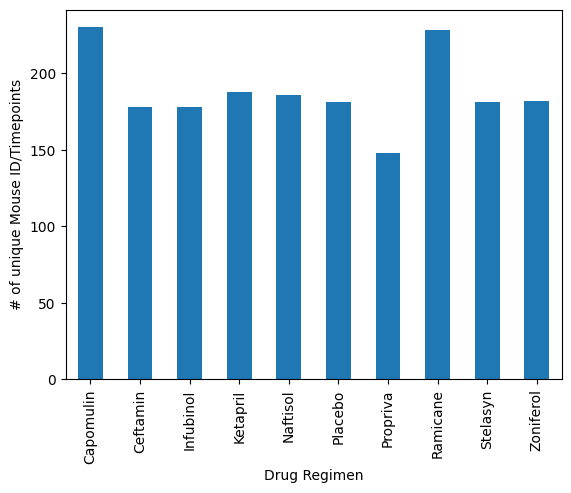

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
Drug_counts=grouped.size()
Drug_counts.plot(kind='bar')
plt.ylabel('# of unique Mouse ID/Timepoints')
plt.show()

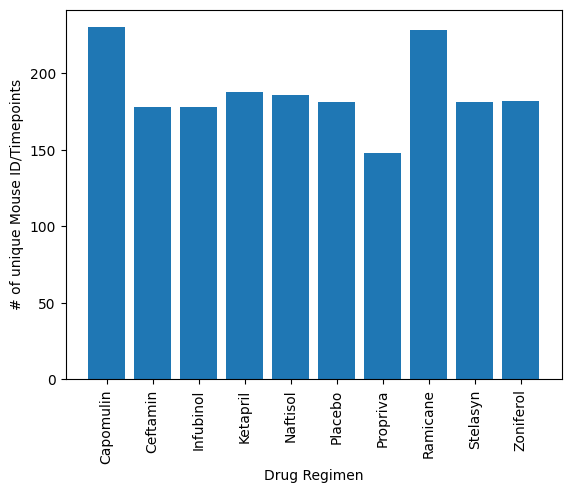

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
pyplotBar=grouped.size()
pyplotBar.index
plt.bar(pyplotBar.index,pyplotBar)
plt.xticks(rotation=90)
plt.xlabel('Drug Regimen')
plt.ylabel('# of unique Mouse ID/Timepoints')
plt.show()

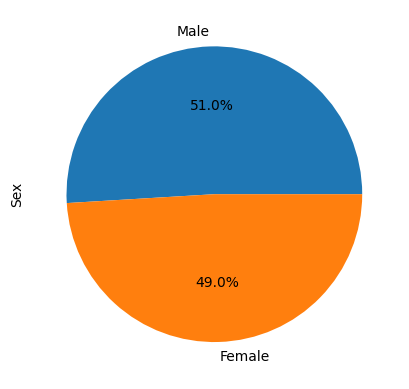

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
miceSex=Combined_NoDup['Sex'].value_counts()
miceSex.plot(kind='pie',autopct='%1.1f%%')
plt.ylabel('Sex')
plt.show()

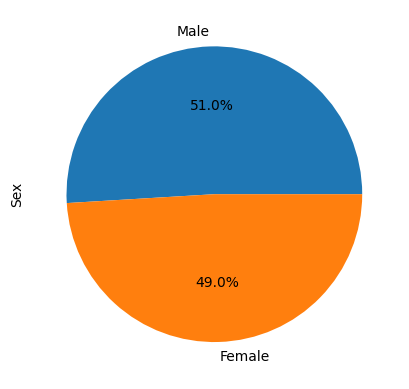

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(miceSex,labels=miceSex.index,autopct='%1.1f%%')
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
Combined_NoDup_final4=Combined_NoDup[(Combined_NoDup['Drug Regimen']=='Capomulin')|
                                     (Combined_NoDup['Drug Regimen']=='Ramicane')|
                                     (Combined_NoDup['Drug Regimen']=='Infubinol')|
                                     (Combined_NoDup['Drug Regimen']=='Ceftamin')
]

# Start by getting the last (greatest) timepoint for each mouse
lastTimepoint= Combined_NoDup_final4.groupby('Mouse ID')['Timepoint'].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged= pd.merge(Combined_NoDup_final4,lastTimepoint,on= ['Mouse ID','Timepoint'])
merged


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,45,38.982878,2,Capomulin,Female,9,22
1,c326,5,36.321346,0,Infubinol,Female,18,25
2,c139,45,72.226731,2,Infubinol,Male,11,28
3,v339,5,46.250112,0,Infubinol,Male,20,26
4,a577,30,57.031862,2,Infubinol,Female,6,25
...,...,...,...,...,...,...,...,...
95,t565,45,34.455298,0,Capomulin,Female,20,17
96,i557,45,47.685963,1,Capomulin,Female,1,24
97,m957,45,33.329098,1,Capomulin,Female,3,19
98,f966,20,30.485985,0,Capomulin,Male,16,17


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
DrugRegimen4=merged['Drug Regimen'].unique()


# Create empty list to fill with tumor vol data (for plotting)
tumor_vol=merged['Tumor Volume (mm3)'].to_list()
tumor_vol
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds


[38.98287774,
 36.3213458,
 72.2267309,
 46.25011212,
 57.03186187,
 67.68556862,
 66.19691151,
 62.11727887,
 55.62942846,
 62.75445141,
 65.52574285,
 67.28962147,
 54.65654872,
 38.34200823,
 36.56165229,
 31.56046955,
 38.4076183,
 43.0475426,
 37.31123552,
 36.13485243,
 44.18345092,
 22.05012627,
 33.39765251,
 37.22565033,
 32.97852192,
 33.56240217,
 29.12847181,
 38.81036633,
 40.66771292,
 30.56462509,
 43.16637266,
 31.09533505,
 30.27623175,
 40.65900627,
 30.63869575,
 43.41938077,
 54.04860769,
 45.22086888,
 60.96971133,
 67.97341878,
 61.38666032,
 46.78453491,
 64.29983003,
 48.72207785,
 57.91838132,
 55.74282869,
 67.74866174,
 64.72983655,
 68.59474498,
 59.85195552,
 61.84902336,
 52.92534846,
 45.0,
 67.52748237,
 47.7846818,
 66.08306589,
 45.69933088,
 47.01036401,
 60.16518046,
 55.65068132,
 51.54243058,
 50.00513807,
 62.43540402,
 58.26844248,
 45.0,
 68.92318457,
 62.99935619,
 64.63494887,
 45.0,
 61.43389223,
 56.05774909,
 59.74190064,
 64.19234114,
 45.

In [16]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


## Line and Scatter Plots

In [17]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


In [18]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

In [19]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
